# Mock data

This python notebook is about generating Mock data using **normal** and **uniform** functions. 

In [1]:
# libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

# 1. [numpy] random.uniform( ) function

We use this function to create a sample of values to generate mock data. 
Values drawn by the random.uniform() function have the same probability 
of falling in the interval [a,b).

The probability density distribution of the uniform distribution is:

$p(x) = \frac{1}{b-a}$

More info here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html

In [2]:
# Does it mean that a distribution on x values between [0,1) I'll get all numbers between 0 and 0.999?

x_t = np.random.uniform(0,1,10)
x_t

array([0.98359163, 0.79638411, 0.02217474, 0.80677071, 0.99690764,
       0.7172789 , 0.61171986, 0.5846842 , 0.03588216, 0.63061899])

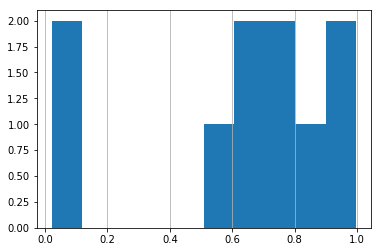

In [3]:
plt.hist(x_t, bins = 10)
plt.grid(b = True, axis = 'x', which = 'major')
# This histogram shows, for instance, 
#the number of values drawn by the function that fall in certain bin between [0,1)

# 2. [numpy] random.normal( ) function

We are going to use the random.normal( ) function to generate Gaussian noise in the values given by the "uniform distribution". We also are going to use this function to generate random values for the error bars of our mock data.

In this case, values are drawn from a normal (Gaussian) distribution. The function asks the user for a "mean" value (denoted as loc, and referring to the centre of the distribution) and also for a value for the standard deviation (denoted as scale, which indicates the width of the disribution). 

The probability density for the Gaussian distribution is:

$p(x) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp \Biggr ( -\frac{(x-\mu)^2}{2\sigma^2} \Biggr)$ 

The numpy.random.normal is more likely to return samples lying close to the mean, rather than those far away.

See more info here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html

In [4]:
# If I do a random.normal(0,1) do a get a Gaussian centred in 0 and with a width of 2? Yes. See the histogram below.

x_rn_t = np.random.normal(0,1,1000)
#x_rn_t
# The third value is the size of the array. In this case the output is an array of 1000 numbers

Text(0.5,1,'Values centred in 0 with standard deviation of 1')

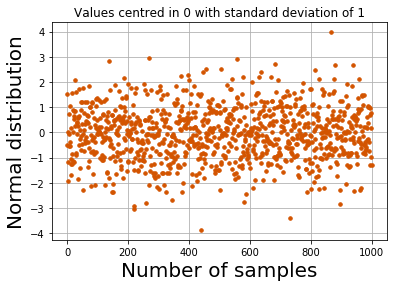

In [5]:
# 
plt.plot(x_rn_t, marker = 'o', markersize = 3.5, color = '#d35400', linestyle = 'None')
plt.grid()
plt.xlabel('Number of samples', size = 20)
plt.ylabel("Normal distribution", size = 20)
plt.title("Values centred in 0 with standard deviation of 1")

(array([  1.,   2.,   5.,  14.,  24.,  50.,  86., 122., 148., 167., 139.,
        109.,  59.,  45.,  17.,   8.,   3.,   0.,   1.]),
 array([-3.86778406, -3.45511454, -3.04244502, -2.6297755 , -2.21710598,
        -1.80443646, -1.39176694, -0.97909742, -0.5664279 , -0.15375838,
         0.25891114,  0.67158066,  1.08425018,  1.49691969,  1.90958921,
         2.32225873,  2.73492825,  3.14759777,  3.56026729,  3.97293681]),
 <a list of 19 Patch objects>)

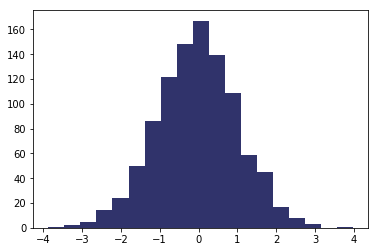

In [6]:
plt.hist(x_rn_t, bins = 19, color = '#30336b')

# Generating mock data

Text(0,0.5,'measurements [y fake]')

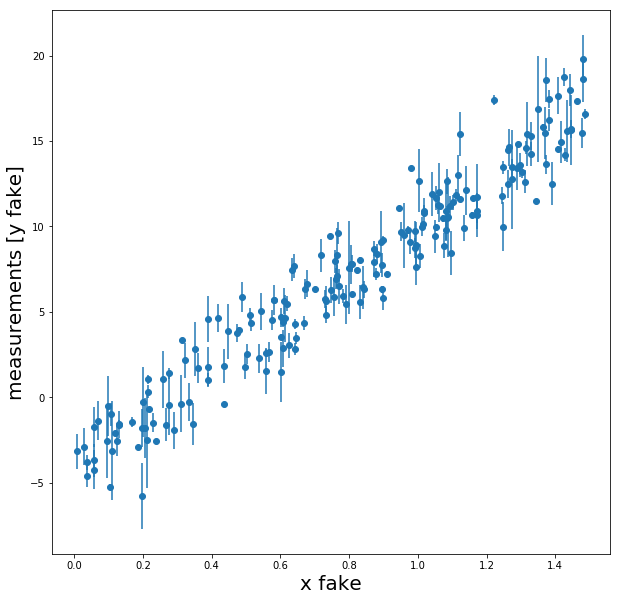

In [7]:

##### First ##### Use the random.uniform() function to generate x values in the for of: y = m*x + b
npoint = 200 #Number of points we want to generate
x_fake = np.random.uniform(0.0, 1.5, npoint) 
##### Second ##### Generate the line y_fake = m_fake*x_fake + b_fake
m_fake = 14
b_fake = -4
y_fake = m_fake* x_fake +b_fake
##### Third ##### Add noise: use the random.gaussian() to add some (Gaussian) noise to the x_fake
gaussian_noise = np.random.normal(0.0, 1.5, npoint) 
y_fake = y_fake + gaussian_noise
##### Fourth #### Error bars: create random values using the random.normal() distribution
error_bars_fake =np.abs(np.random.normal(0,1.0, npoint))
##### Fifth ##### Plot it
figuresize= plt.figure(figsize=(10,10))
plt.errorbar(x_fake,y_fake, yerr = error_bars_fake, linestyle = "None", marker = "o")
plt.xlabel('x fake', size =20)
plt.ylabel('measurements [y fake]', size =20)
#Uncomment the line below to see the points without the error bars
#plt.plot(x_fake,y_fake, linestyle = "None", marker = "o")
#plt.savefig('mock_data.pdf')